In [5]:
import sys
import os
import h5py
from collections import Counter
from progressbar import *
import re
import numpy as np
import itertools
from tqdm import tqdm

par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

if par_dir not in sys.path:
    sys.path.append(par_dir)
    
from repeating_classifier_training import *

In [6]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
"""
'/home/jtindall/old_frame_single_gpu_replication/old_1_gpu_rerun_1_no_shuffle',
'/home/jtindall/old_frame_single_gpu_replication/old_1_gpu_rerun_2_no_shuffle',
'/home/jtindall/old_frame_single_gpu_replication/old_1_gpu_rerun_3_no_shuffle',
"""

locs = ['/home/jtindall/old_frame_single_gpu_replication/old_1_gpu_rerun_4',
        '/home/jtindall/old_frame_single_gpu_replication/old_1_gpu_rerun_5',
        '/home/jtindall/old_frame_single_gpu_replication/old_1_gpu_rerun_7',
        '/home/jtindall/old_frame_single_gpu_replication/old_1_gpu_rerun_8',
        '/home/jtindall/old_frame_single_gpu_replication/old_1_gpu_rerun_9',
        '/home/jtindall/old_frame_single_gpu_replication/old_framework_run_b_1',
        '/home/jtindall/old_frame_single_gpu_replication/old_framework_run_b_2',
        '/home/jtindall/old_frame_single_gpu_replication/old_framework_run_b_3',
        '/home/jtindall/old_frame_single_gpu_replication/old_framework_run_b_4',
        '/home/jtindall/old_frame_single_gpu_replication/old_framework_run_b_5'
       ]

titles = ['Single GPU Run 1', 
          'Single GPU Run 2', 
          'Single GPU Run 3',
          'Single GPU Run 4',
          'Single GPU Run 5',
          'Single GPU Run 6',
          'Single GPU Run 7',
          'Single GPU Run 8',  
          'Single GPU Run 9',  
          'Single GPU Run 10'
         ]

idx_file_paths = ['/fast_scratch/WatChMaL/data/IWCD_fulltank_300_post_veto_nomichel_pe_idxs.npz'
                  for _ in range(len(locs))]

cut_names= [['fq_failed', 'fq_flag'] for _ in range(len(locs))]
cut_path = '/home/jtindall/indices/pointnet_cut_indices.npz'

npz_path = os.path.join(os.getcwd(),'Index_Storage')
LABEL_DICT = {0:"gamma", 1:"e", 2:"mu"}
index_dict = {value:key for key, value in LABEL_DICT.items()}

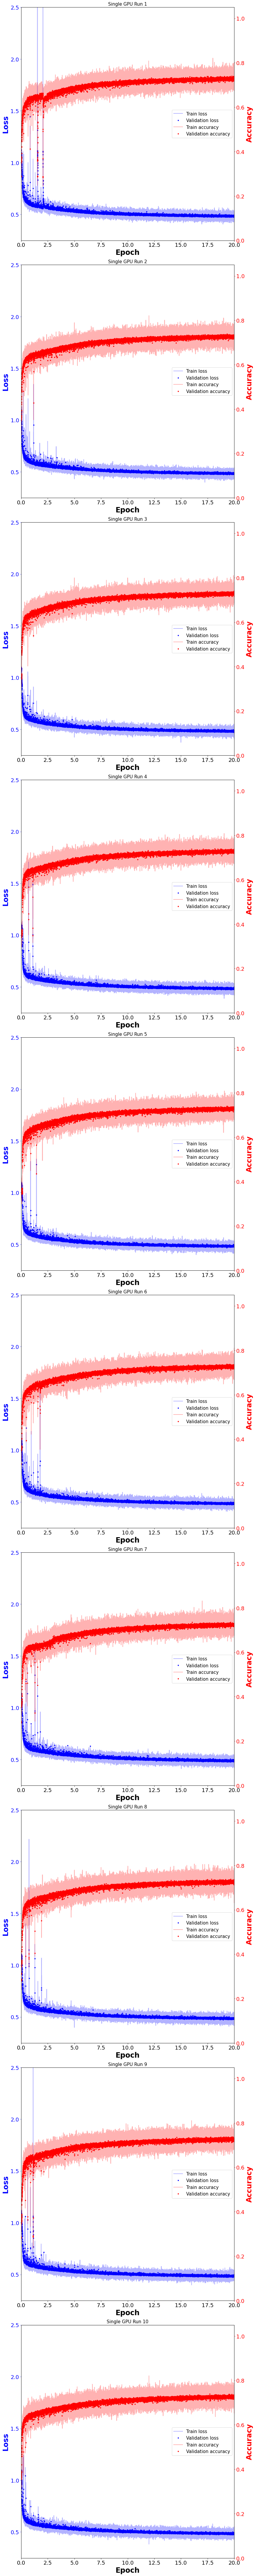

In [8]:
fig = disp_multiple_learn_hist(locs,losslim=2.5,titles=titles,leg_font=15, title_font=15,xmax=20)

In [9]:
test_output = [load_test_output_pn(os.path.join(loc,'test_validation_iteration_dump.npz'),
                                   cut_path,
                                   np.load(idx_file_paths[i])['test_idxs'], cut_names[i])
               for i, loc in enumerate(locs)]


In [10]:
plot_outputs = test_output
plot_labels = titles
linestyle = [':',':',':',':',':',':',':',':',':',':']
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
linecolor = [c[0],c[1],c[2],c[3],c[4],c[5],c[6],c[7],c[8],c[9]]

In [11]:
fprs, tprs, thresholds = zip(*[prep_roc_data(output['softmax'],output['labels'],
                                'rejection',index_dict,"e","mu") for output in plot_outputs])

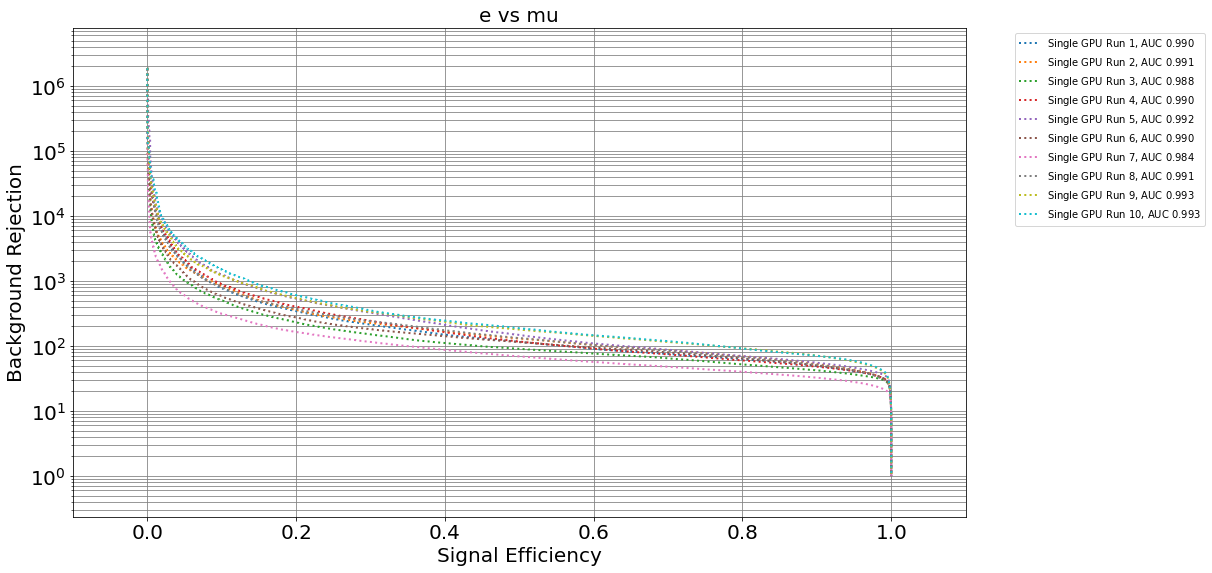

In [12]:
roc_metrics = plot_multiple_ROC((fprs, tprs, thresholds),'rejection', ["e", "mu"], 
                                plot_labels=plot_labels, linestyle=linestyle,linecolor=linecolor,
                                png_name = 'overlaid_roc',title='e vs mu',annotate=False)

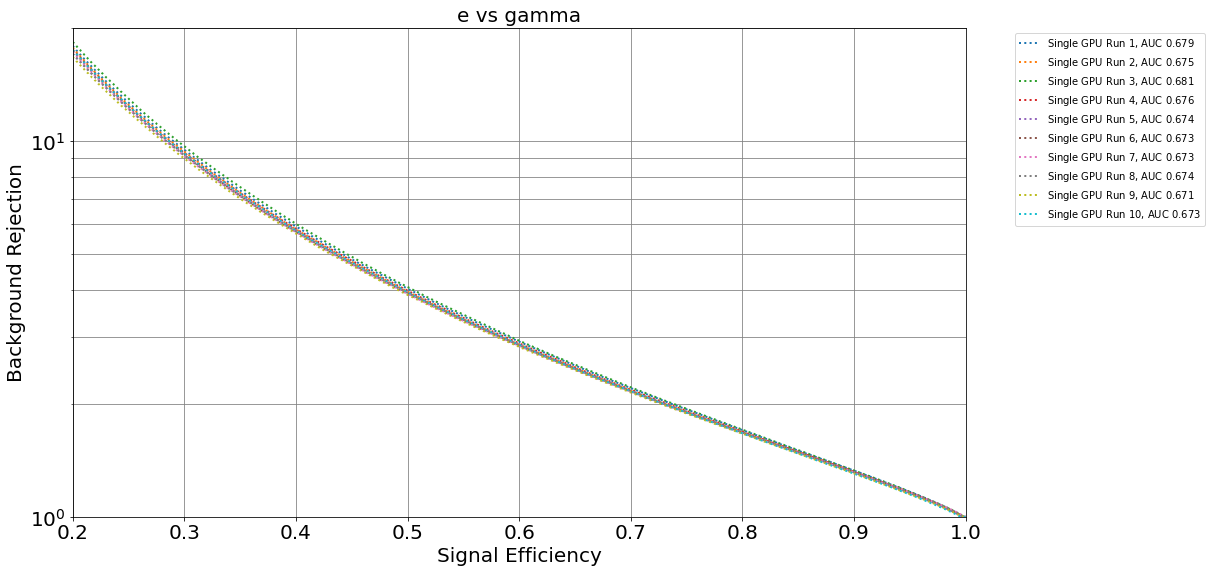

In [13]:
fprs, tprs, thresholds = zip(*[prep_roc_data(output['softmax'], output['labels'], 'rejection',
                                             index_dict, "e", "gamma") for output in plot_outputs])
roc_metrics = plot_multiple_ROC((fprs, tprs, thresholds),'rejection', ["e", "gamma"], plot_labels=plot_labels,
                                png_name = 'overlaid_roc',title='e vs gamma',annotate=False,
                                linestyle=linestyle,linecolor=linecolor, xlim=[0.2,1.0],ylim=[1e0,2e1])

In [14]:
collapsed_softmaxes, collapsed_labels = zip(
    *[collapse_test_output(output['softmax'], output['labels'], index_dict, ignore_type="gamma")
      for output in plot_outputs])

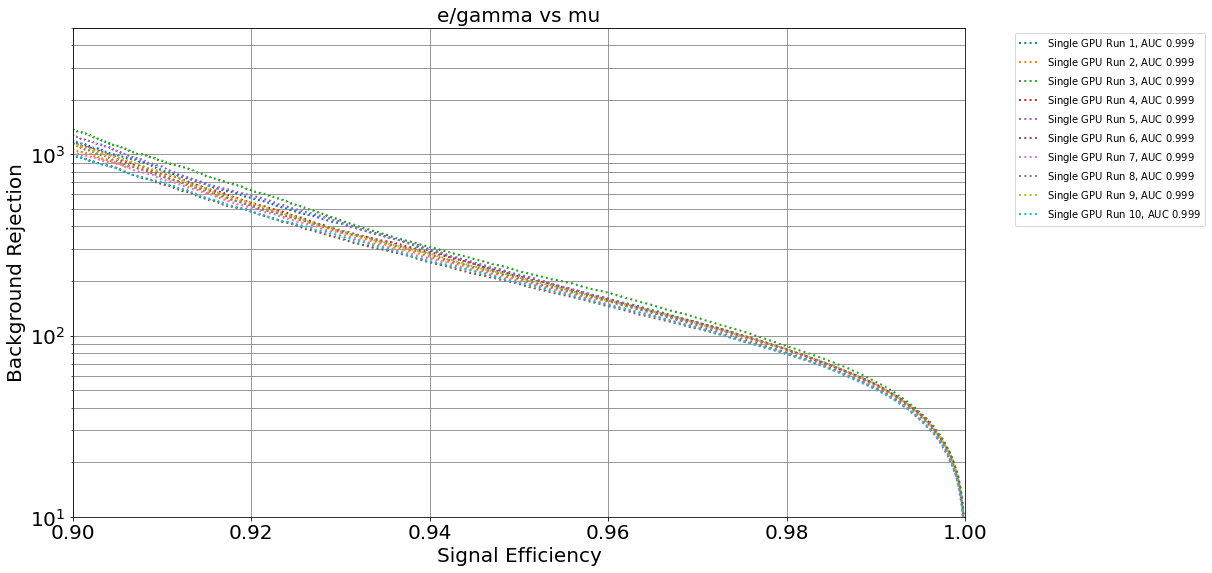

In [15]:
fprs, tprs, thresholds = zip(*[prep_roc_data(softmaxes, labels, 'rejection', index_dict, "e", "mu")
                               for softmaxes, labels in zip(collapsed_softmaxes, collapsed_labels)])
roc_metrics = plot_multiple_ROC((fprs, tprs, thresholds),'rejection', ["e", "mu"],
                                plot_labels=plot_labels, xlim=[0.9,1.0],ylim=[1e1,5e3],
                                png_name = 'overlaid_roc',title='e/gamma vs mu',annotate=False,
                                linestyle=linestyle,linecolor=linecolor, leg_loc='lower left')